<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix
from sklearn import tree

In [2]:
data = pd.read_csv("/content/employee_data (1) 2.csv")

In [3]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [34]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [35]:
data.shape

(14249, 10)

In [36]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [4]:
data['filed_complaint'].fillna(0,inplace=True)

In [5]:
data['recently_promoted'].fillna(0,inplace=True)

In [6]:
data['department'] = data['department'].fillna(data['department'].mode()[0])

In [7]:
miss = data[['last_evaluation','satisfaction','tenure']]
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(miss)

In [8]:
df1 = pd.DataFrame(df,columns=miss.columns)

In [9]:
data = data.drop(columns = ['last_evaluation','satisfaction','tenure'])

In [17]:
data1 = data.join(df1)

In [11]:
data1.head()

,avg_monthly_hrs,department,filed_complaint,n_projects,recently_promoted,salary,status,last_evaluation,satisfaction,tenure
0,221,engineering,0.0,4,0.0,low,Left,0.932868,0.829896,5.0
1,232,support,0.0,3,0.0,low,Employed,0.586962,0.834544,2.0
2,184,sales,0.0,3,0.0,medium,Employed,0.788830,0.834988,3.0
3,206,sales,0.0,4,0.0,low,Employed,0.575688,0.424764,2.0
4,249,sales,0.0,3,0.0,low,Employed,0.845217,0.779043,3.0


In [12]:
data1.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
n_projects           0
recently_promoted    0
salary               0
status               0
last_evaluation      0
satisfaction         0
tenure               0
dtype: int64

In [13]:
data1.describe()

,avg_monthly_hrs,filed_complaint,n_projects,recently_promoted,last_evaluation,satisfaction,tenure
count,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000
mean,199.795775,0.144431,3.773809,0.021054,0.714922,0.621295,3.497228
std,50.998714,0.351539,1.253126,0.143570,0.167660,0.248873,1.451608
min,49.000000,0.000000,1.000000,0.000000,0.316175,0.040058,2.000000
25%,155.000000,0.000000,3.000000,0.000000,0.568392,0.453588,3.000000
50%,199.000000,0.000000,4.000000,0.000000,0.718477,0.647489,3.000000
75%,245.000000,0.000000,5.000000,0.000000,0.860217,0.822709,4.000000
max,310.000000,1.000000,7.000000,1.000000,1.000000,1.000000,10.000000


EXPLORATORY DATA ANALYSIS

<Axes: xlabel='tenure', ylabel='Count'>

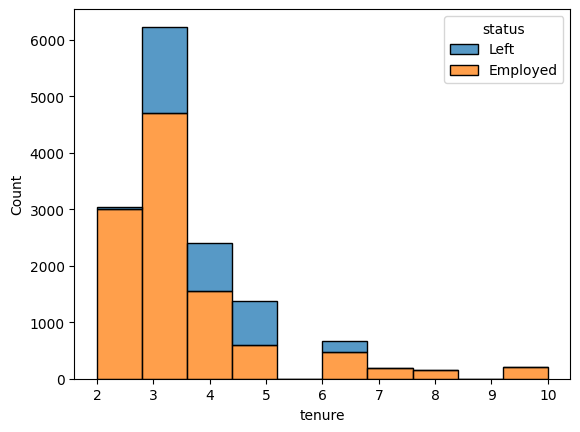

In [14]:
sns.histplot(data1,x="tenure", hue="status",multiple='stack',bins=10)

<Axes: title={'center': 'tenure'}, xlabel='status'>

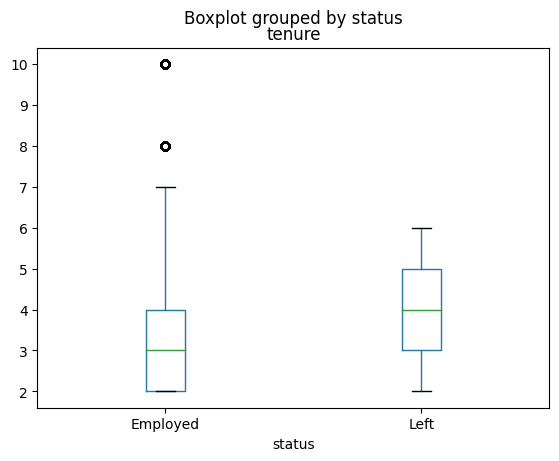

In [18]:
data1.boxplot(by ='status', column =['tenure'], grid = False)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['status'] = le.fit_transform(data1['status'])
data1['salary'] = le.fit_transform(data1['salary'])

In [20]:
data1.head()

,avg_monthly_hrs,department,filed_complaint,n_projects,recently_promoted,salary,status,last_evaluation,satisfaction,tenure
0,221,engineering,0.0,4,0.0,low,1,0.932868,0.829896,5.0
1,232,support,0.0,3,0.0,low,0,0.586962,0.834544,2.0
2,184,sales,0.0,3,0.0,medium,0,0.788830,0.834988,3.0
3,206,sales,0.0,4,0.0,low,0,0.575688,0.424764,2.0
4,249,sales,0.0,3,0.0,low,0,0.845217,0.779043,3.0


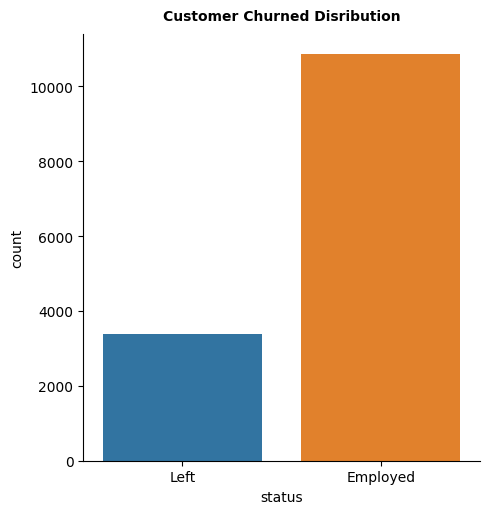

In [24]:
sns.catplot(x ="status",kind ="count", data=data)
plt.title("Customer Churned Disribution",fontweight="black",size=10,pad=10)
plt.show()

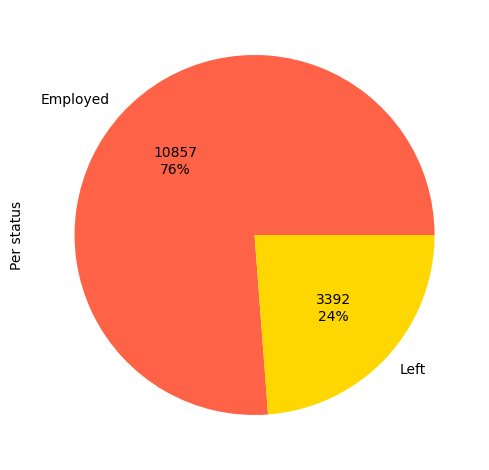

In [23]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
label = ['Employed','Left']
data1.groupby('status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},colors=['tomato', 'gold'],labels=label)
plt.ylabel('Per status')
plt.tight_layout()
plt.show()

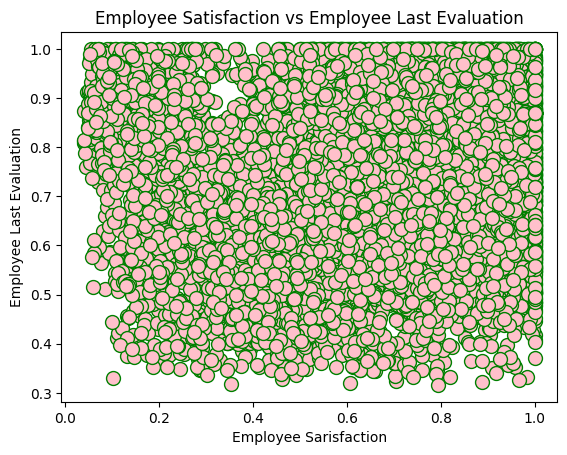

In [38]:
plt.scatter(data1['satisfaction'],data1['last_evaluation'],c='pink',edgecolor='green',s=100)
plt.xlabel("Employee Sarisfaction")
plt.ylabel("Employee Last Evaluation")
plt.title("Employee Satisfaction vs Employee Last Evaluation")
plt.show()

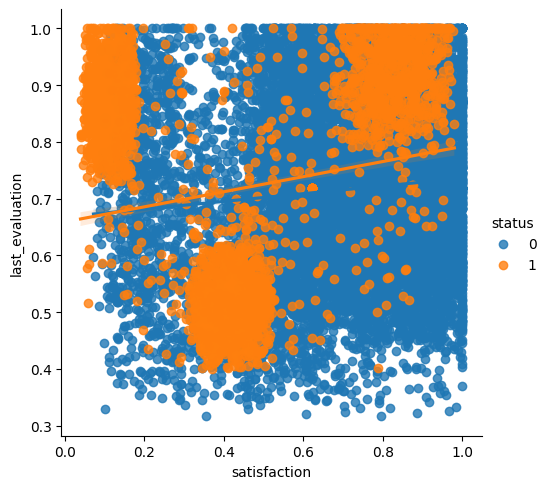

In [42]:
sns.lmplot(x='satisfaction',y='last_evaluation',hue='status',data=data1)

In [50]:
d = data1[['satisfaction','last_evaluation']]
d.corr()

,satisfaction,last_evaluation
satisfaction,1.000000,0.107262
last_evaluation,0.107262,1.000000


In [64]:
x = data1.drop(columns=["status","filed_complaint","recently_promoted","department","avg_monthly_hrs"])
y = data1["status"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

GINI

In [65]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='best')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_test_pred = dtree.predict(x_test)
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 94.28 %


ENTROPY

In [69]:
dtree = DecisionTreeClassifier(criterion='entropy',splitter='best')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
y_pred = dtree.predict(x_test)
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 94.77 %


In [75]:
x_train.head()

,n_projects,salary,last_evaluation,satisfaction,tenure
8119,5,2,0.902732,0.865500,5.0
6360,4,1,0.834351,0.972236,3.0
6637,2,2,0.480867,0.436215,3.0
5383,3,1,0.635900,0.693380,3.0
9128,2,1,0.557626,0.386809,3.0


In [79]:
data1.head()

,avg_monthly_hrs,department,filed_complaint,n_projects,recently_promoted,salary,status,last_evaluation,satisfaction,tenure
0,221,engineering,0.0,4,0.0,1,1,0.932868,0.829896,5.0
1,232,support,0.0,3,0.0,1,0,0.586962,0.834544,2.0
2,184,sales,0.0,3,0.0,2,0,0.788830,0.834988,3.0
3,206,sales,0.0,4,0.0,1,0,0.575688,0.424764,2.0
4,249,sales,0.0,3,0.0,1,0,0.845217,0.779043,3.0


In [92]:
import graphviz

In [102]:
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names= ['n_projects','satisfaction','tenure','last_evaluation','salary'],
                                class_names = ['Left','Employed'],
                                filled=True)

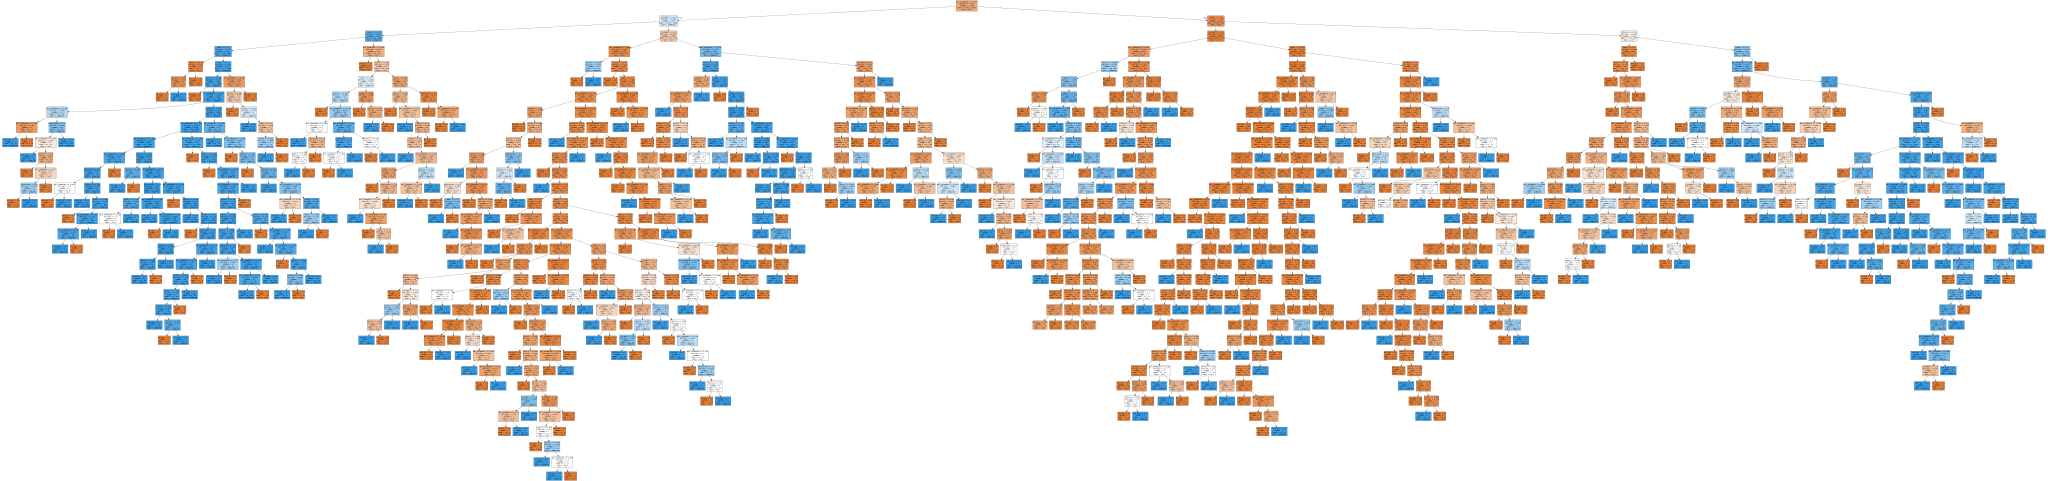

In [108]:
graphviz.Source(dot_data, format="png")